In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings 
warnings.filterwarnings("ignore")

- Inertia measures the sum of squared distances of samples to their closest cluster center.
- **Silhouette score**

    measures how similar an object is to its own cluster compared to other clusters.

- **Davies-Bouldin index** 

    This function computes the Davies-Bouldin score for a given clustering. The Davies-Bouldin score measures the average similarity between each cluster and its most similar cluster, where similarity is based on the ratio of within-cluster distances to between-cluster distances

In [28]:
#create DataFrame
df = pd.DataFrame({'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})

#view first five rows of DataFrame
df

,points,assists,rebounds
0,18.0,3.0,15
1,NaN,3.0,14
2,19.0,4.0,14
3,14.0,5.0,10
4,14.0,4.0,8
5,11.0,7.0,14
6,20.0,8.0,13
7,28.0,7.0,9
8,30.0,6.0,5
9,31.0,9.0,4


In [29]:
#drop rows with NA values in any columns
df = df.dropna()

<Axes: xlabel='points', ylabel='assists'>

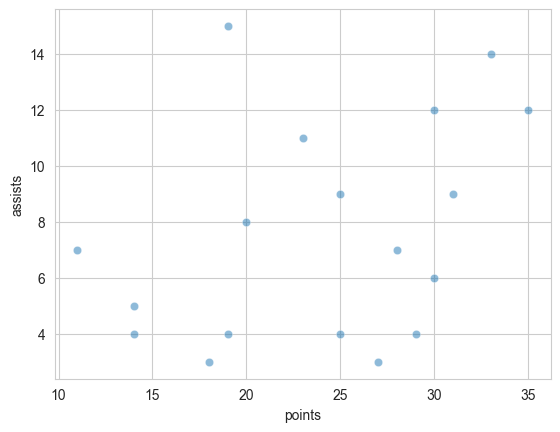

In [30]:
sns.scatterplot(x='points', y='assists', data=df, markers='o', alpha=0.5)

In [31]:
X = df[['points', 'assists']]

In [32]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
#scaled_df = StandardScaler().fit_transform(X)

### **Calculate Within-Cluster Sum of Squares (WCSS)**
- WCSS represents the sum of squared distances between data points and their cluster centroids.

In [33]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,17):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

In [34]:
sse

[1101.2222222222222,
 441.7922077922078,
 287.78571428571433,
 156.6,
 117.10000000000001,
 103.46666666666667,
 66.5,
 55.166666666666664,
 45.0,
 33.66666666666667,
 18.666666666666668,
 14.666666666666668,
 10.666666666666668,
 8.166666666666668,
 4.0,
 1.5]

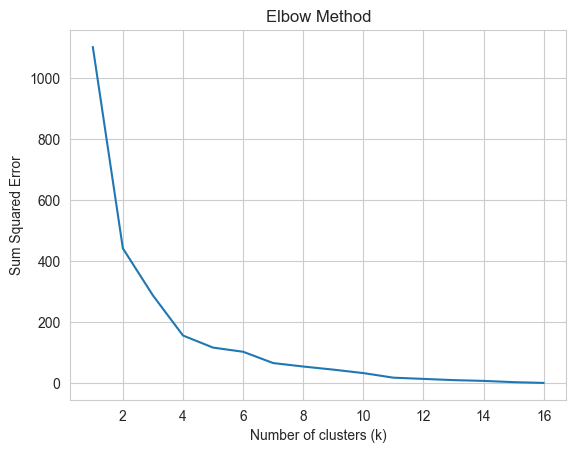

In [35]:
# Plotting
sns.set_style("whitegrid")
plt.plot(range(1, 17), sse)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum Squared Error")
plt.title("Elbow Method")
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=2)

In [37]:
kmeans.cluster_centers_

array([[27.8 ,  4.8 ],
       [15.2 ,  4.6 ],
       [32.25, 11.75],
       [21.75, 10.75]])

In [38]:
df['pred'] = kmeans.fit_predict(X)
df

,points,assists,rebounds,pred
0,18.0,3.0,15,1
2,19.0,4.0,14,1
3,14.0,5.0,10,1
4,14.0,4.0,8,1
5,11.0,7.0,14,1
6,20.0,8.0,13,3
7,28.0,7.0,9,0
8,30.0,6.0,5,0
9,31.0,9.0,4,2
10,35.0,12.0,11,2


In [39]:
pred = kmeans.fit_predict(X)

Text(0, 0.5, 'Assists')

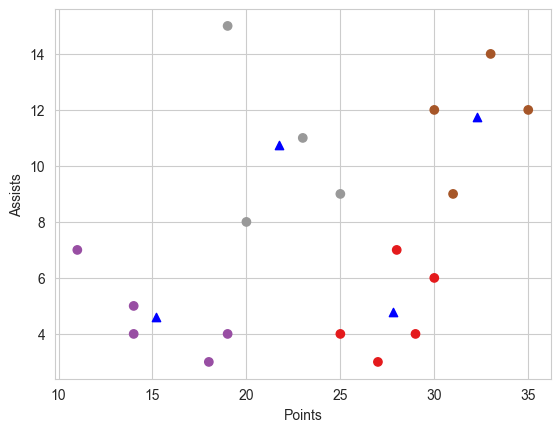

In [40]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = pred, cmap='Set1')
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^', c = 'blue')
plt.xlabel("Points")
plt.ylabel("Assists")

In [41]:
# Evaluate using different metrics
inertia = kmeans.inertia_
silhouette = silhouette_score(X, pred)
davies_bouldin = davies_bouldin_score(X, pred)
calinski_harabasz = calinski_harabasz_score(X, pred)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

Inertia: 156.6
Silhouette Score: 0.45939544284868755
Davies-Bouldin Index: 0.6551228750085288
